<a href="https://colab.research.google.com/github/itsAnkitcode001/Prediction_using_Unsupervised_learning/blob/main/Prediction_using_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
#import file from google colab by using pandas
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [140]:
dfs=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Iris.csv')
dfs.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Scatter plot of data before clustring

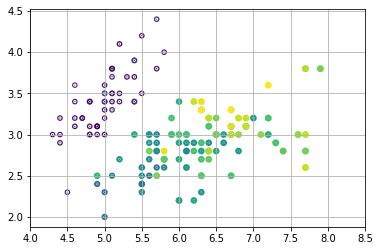

In [141]:
plt.scatter(dfs['SepalLengthCm'],dfs['SepalWidthCm'],dfs['PetalLengthCm'],dfs['PetalWidthCm'],linewidths=4.5)
plt.xlim(4,8.5)
plt.grid()

# Finding the optimal value for clustering the data

In [142]:
k_value_range=range(1,10)#by looking the data, here I gave a range to the value of k and from the it find optimal value
SSE=[]                  # Sum of Squared error
for k in k_value_range:
  km=KMeans(n_clusters=k)
  km.fit(dfs[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
  SSE.append(km.inertia_)#INERTIA FUNCTION CALCULATE THE SSE FROM DATA AND IT WILL STORE IN SSE VARAIABLE BY APPENDING


In [108]:

SSE   #sse value of all corresponding value of k

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.95701115711985,
 34.299985543844244,
 29.955568877177576,
 28.044860978203086]

 **ELBOW GRAPH**
 THIS GRAPH WILL HELP US FOR FINDING THE OPTIMAL VALUE OF K.THIS GRAPH WILL LOOK SAME AS OUR HAND STRUCTURE SO THERE ELBOW POSITION WILL TELL US THAT AT THIS LOCATION YOU WILL GET OPTIMAL VALUE OF CLUSTERING WITH LOW ERROR(SSE)


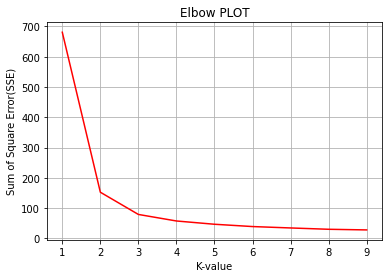

In [161]:
plt.xlabel('K-value')
plt.title('Elbow PLOT')
plt.ylabel('Sum of Square Error(SSE)')
plt.grid()
plt.plot(k_value_range,SSE,color='r')

START DOING CLUSTERING OR IN OTHERWORD MAKING CLASSES BY TAKING K=3

In [144]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [145]:
#this statement done that,it will form cluster as per your k value and fit value as per the cluster(class)
Predicted_y=km.fit_predict(dfs[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
print("Clustring done ")

Clustring done 


In [153]:
Predicted_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [148]:
dfs['cluster']=Predicted_y
dfs.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


In [163]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   cluster        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


CENTROID OF CLUSTER

In [150]:
km.cluster_centers_  #WE HAVE  CENTER VALUES LIKE [SEPALLENGTH,SEPALWIDTH,PETALLENGTH,PETALWIDTH] AND AS WE HAVE 3 CLUSTER SO HERE YOU CAN SEE 3 CENTROID

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

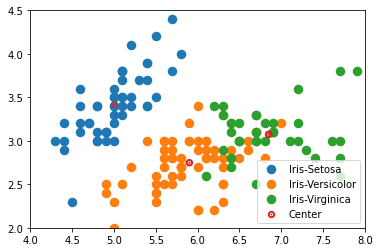

In [158]:
class_1=dfs[dfs.cluster==0]   #ASSIGNING THE CLUSTER=0 VALUE TO THE VARIABLE
class_2=dfs[dfs.cluster==1]   #ASSIGNING THE CLUSTER=1 VALUE TO THE VARIABLE
class_3=dfs[dfs.cluster==2]   #ASSIGNING THE CLUSTER=2 VALUE TO THE VARIABLE
plt.scatter(class_1['SepalLengthCm'],class_1['SepalWidthCm'],linewidths=3.5,label='Iris-Setosa')
plt.scatter(class_2['SepalLengthCm'],class_2['SepalWidthCm'],linewidths=3.5,label='Iris-Versicolor')
plt.scatter(class_3['SepalLengthCm'],class_3['SepalWidthCm'],linewidths=3.5,label='Iris-Virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],label='Center',linewidth=5.5)
plt.xlim(4,8)
plt.ylim(2,4.5)
plt.legend()
